In [1]:
# importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('../data/cleaned_retail_data.csv',parse_dates=['Date'])

In [4]:
df.shape

(300179, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300179 entries, 0 to 300178
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   State             300179 non-null  object        
 1   Country           300179 non-null  object        
 2   Date              300179 non-null  datetime64[ns]
 3   Total_Purchases   300179 non-null  float64       
 4   Product_Category  300179 non-null  object        
 5   Product_Brand     300179 non-null  object        
 6   Product_Type      300179 non-null  object        
 7   products          300179 non-null  object        
 8   product_id        300179 non-null  int64         
 9   Year              300179 non-null  int64         
 10  Month             300179 non-null  int64         
 11  DayOfWeek         300179 non-null  int64         
 12  IsMonthStart      300179 non-null  int64         
 13  IsMonthEnd        300179 non-null  int64         
dtypes: d

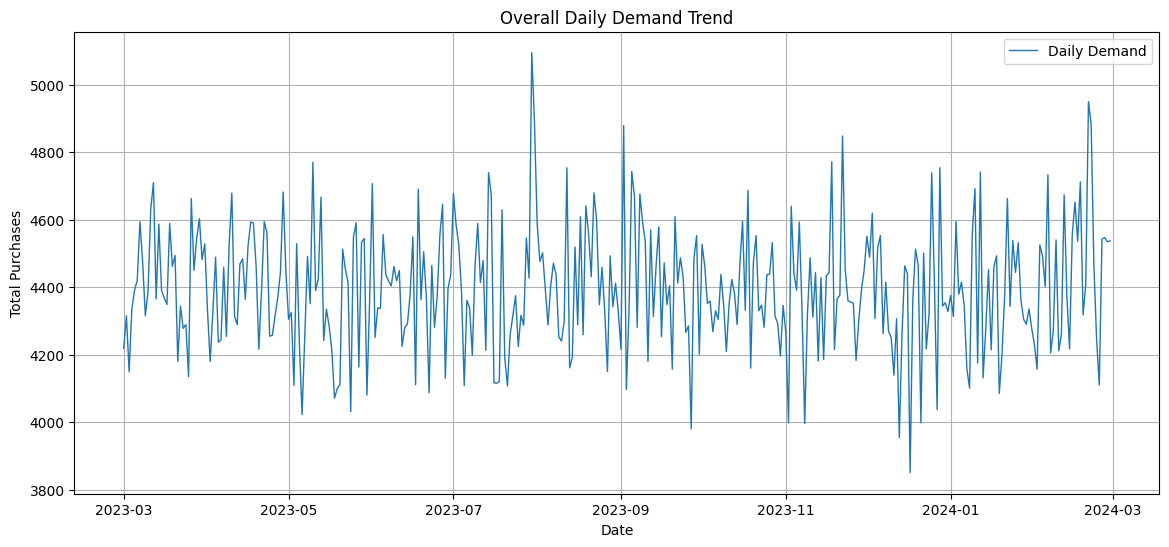

In [6]:
daily = df.groupby('Date')['Total_Purchases'].sum()

import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(daily, label='Daily Demand', linewidth=1)
plt.title("Overall Daily Demand Trend")
plt.xlabel("Date")
plt.ylabel("Total Purchases")
plt.grid(True)
plt.legend()
plt.show()


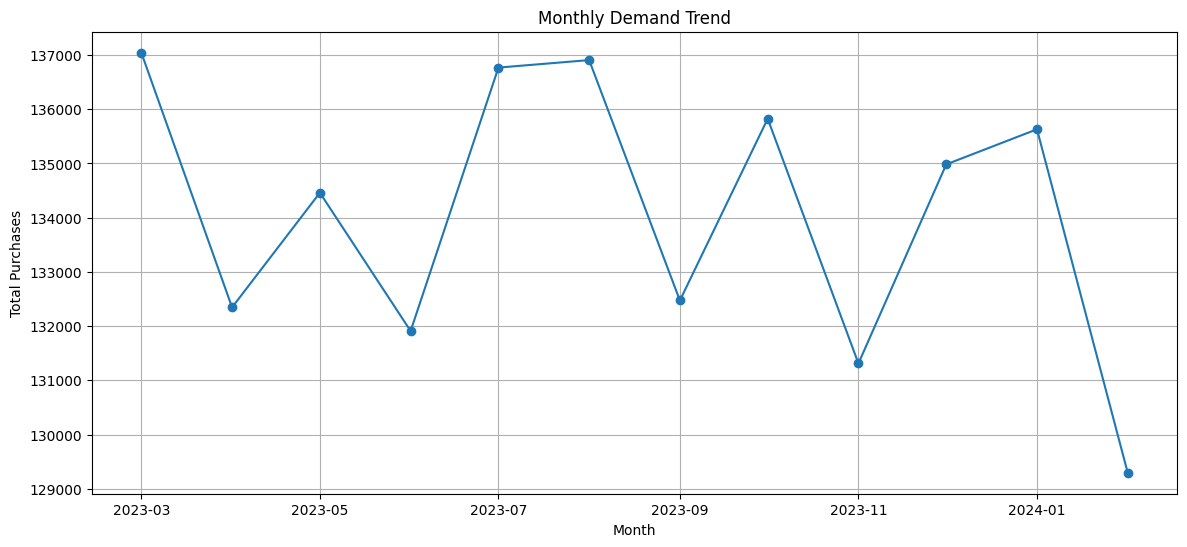

In [7]:
monthly = df.groupby(['Year', 'Month'])['Total_Purchases'].sum()
monthly.index = pd.to_datetime(monthly.index.map(lambda x: f"{x[0]}-{x[1]}-01"))

plt.figure(figsize=(14,6))
plt.plot(monthly, marker='o')
plt.title("Monthly Demand Trend")
plt.xlabel("Month")
plt.ylabel("Total Purchases")
plt.grid(True)
plt.show()


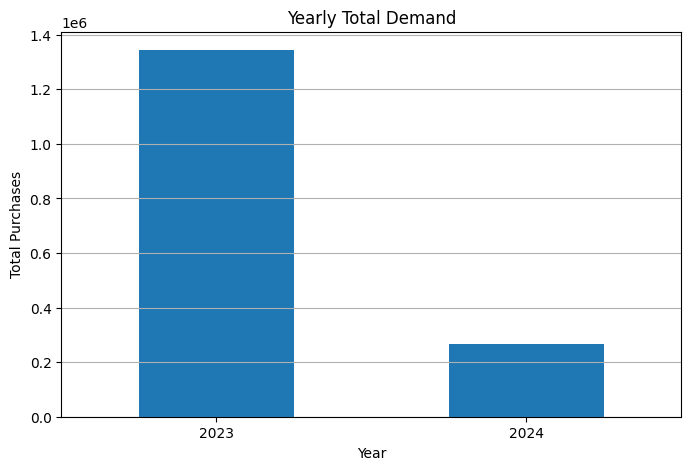

In [8]:
yearly = df.groupby('Year')['Total_Purchases'].sum()

plt.figure(figsize=(8,5))
yearly.plot(kind='bar')
plt.title("Yearly Total Demand")
plt.ylabel("Total Purchases")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


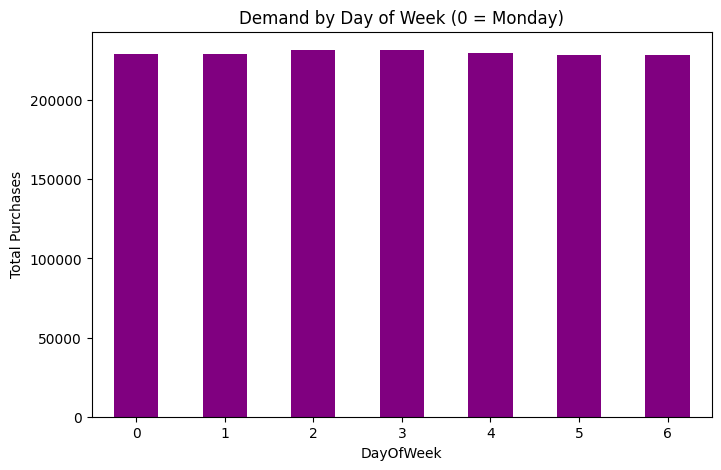

In [9]:
dow = df.groupby('DayOfWeek')['Total_Purchases'].sum()

plt.figure(figsize=(8,5))
dow.plot(kind='bar', color='purple')
plt.title("Demand by Day of Week (0 = Monday)")
plt.ylabel("Total Purchases")
plt.xticks(rotation=0)
plt.show()


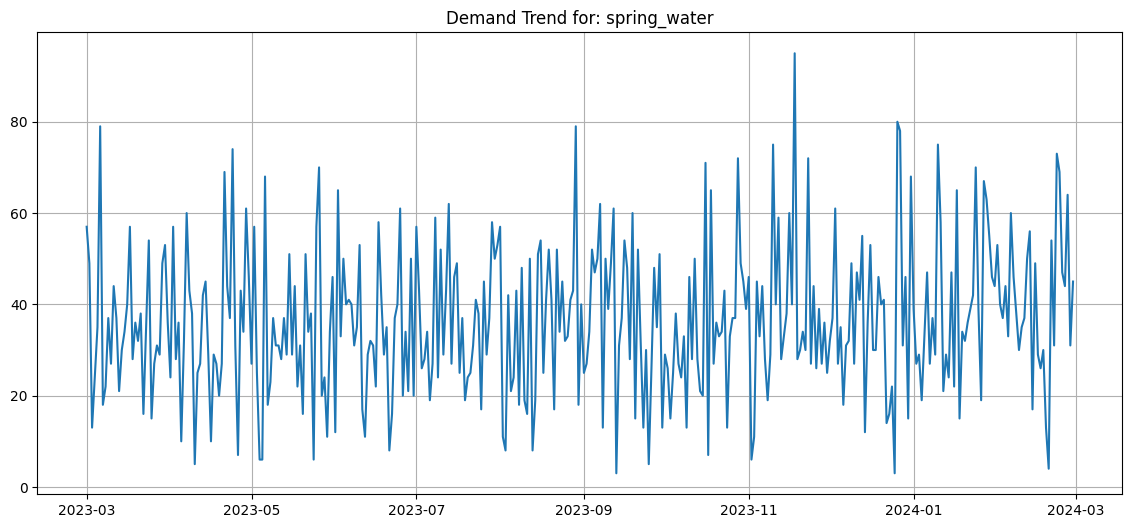

In [11]:
sample = df['products'].value_counts().index[0]   # most common product

p = df[df['products'] == sample].groupby('Date')['Total_Purchases'].sum()

plt.figure(figsize=(14,6))
plt.plot(p)
plt.title(f"Demand Trend for: {sample}")
plt.grid(True)
plt.show()


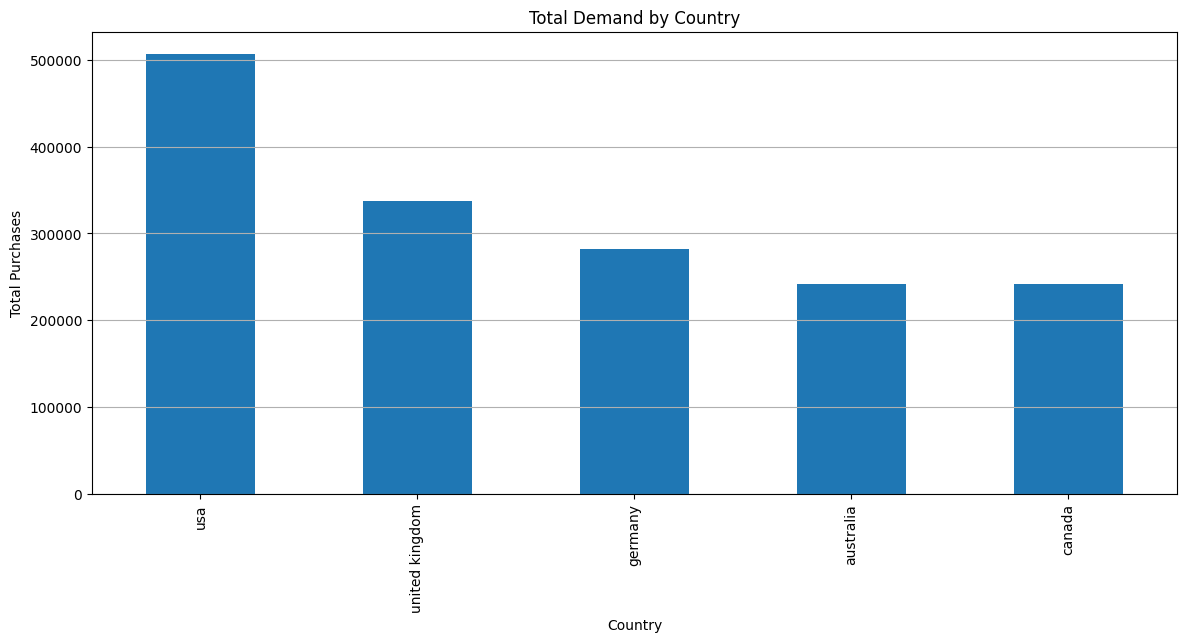

In [12]:
country_total = df.groupby('Country')['Total_Purchases'].sum().sort_values(ascending=False)

plt.figure(figsize=(14,6))
country_total.plot(kind='bar')
plt.title("Total Demand by Country")
plt.ylabel("Total Purchases")
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


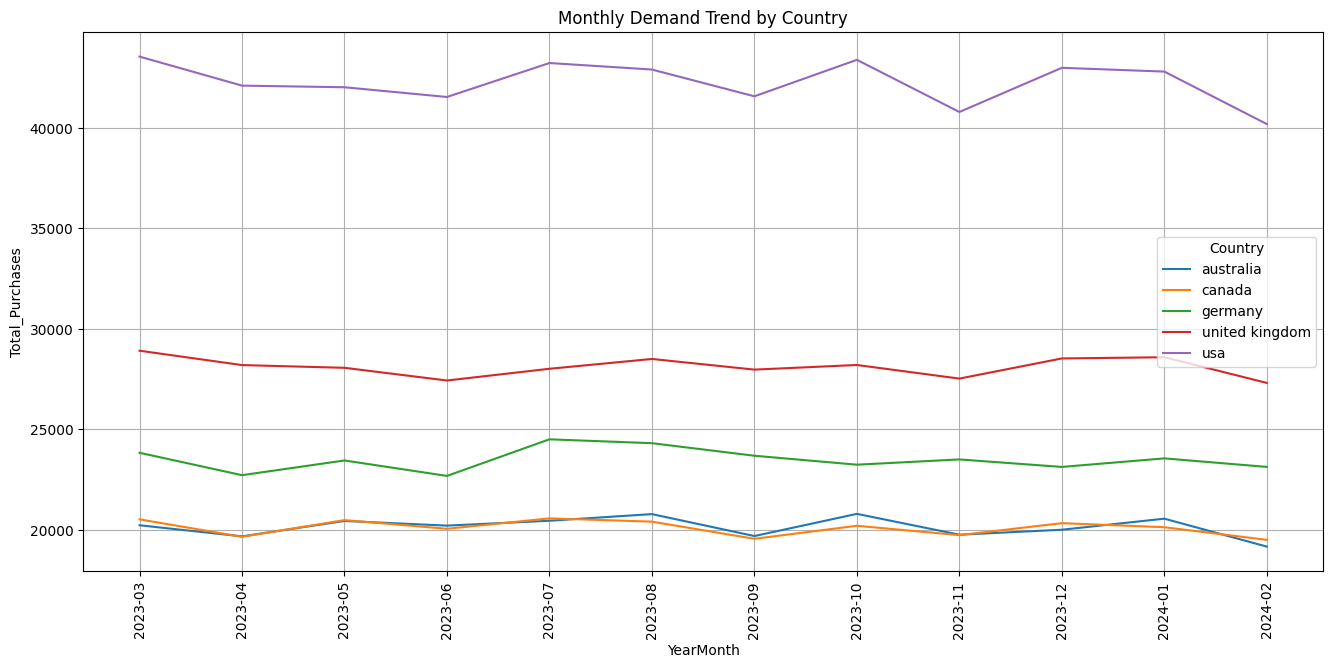

In [13]:
df['YearMonth'] = df['Date'].dt.to_period('M').astype(str)

country_monthly = df.groupby(['Country', 'YearMonth'])['Total_Purchases'].sum().reset_index()

import seaborn as sns

plt.figure(figsize=(16,7))
sns.lineplot(data=country_monthly, x='YearMonth', y='Total_Purchases', hue='Country')
plt.xticks(rotation=90)
plt.title("Monthly Demand Trend by Country")
plt.grid(True)
plt.show()


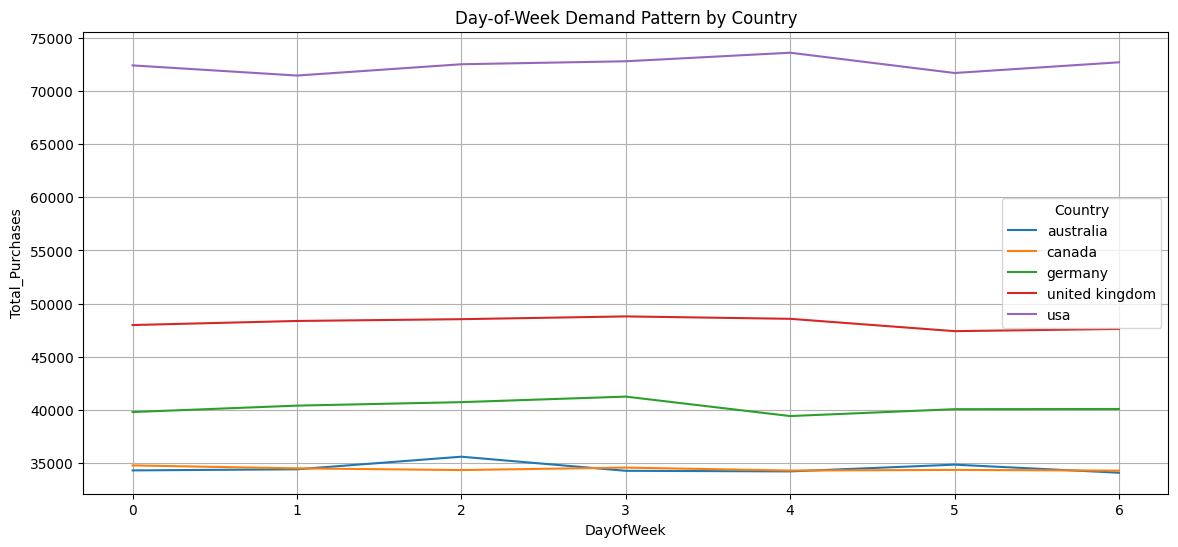

In [14]:
country_dow = df.groupby(['Country', 'DayOfWeek'])['Total_Purchases'].sum().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=country_dow, x='DayOfWeek', y='Total_Purchases', hue='Country')
plt.title("Day-of-Week Demand Pattern by Country")
plt.grid(True)
plt.show()


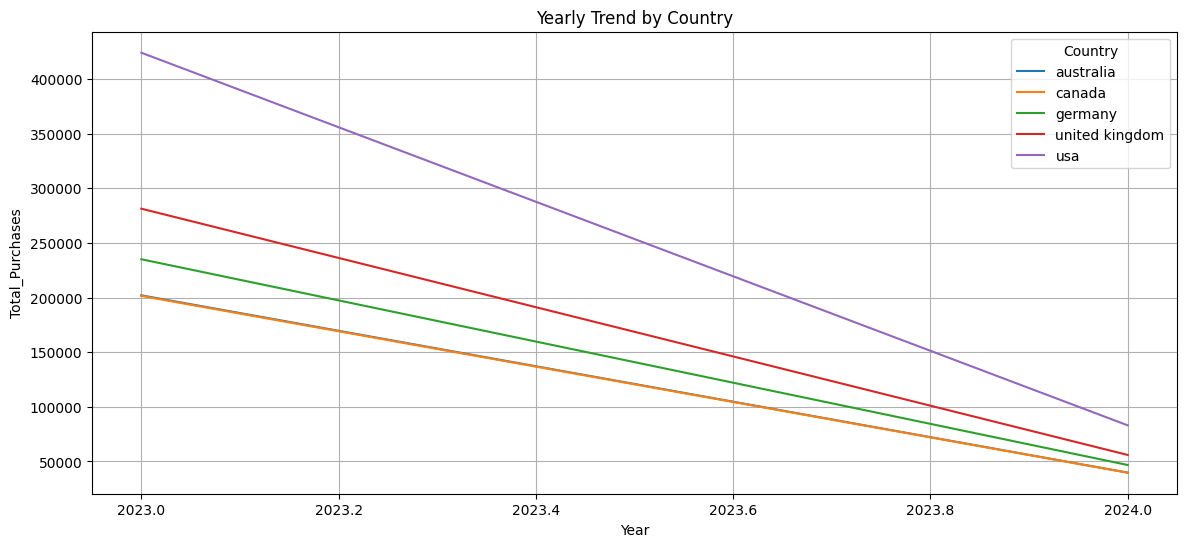

In [15]:
country_yearly = df.groupby(['Country','Year'])['Total_Purchases'].sum().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=country_yearly, x='Year', y='Total_Purchases', hue='Country')
plt.title("Yearly Trend by Country")
plt.grid(True)
plt.show()
